<a href="https://colab.research.google.com/github/Fakhryrama/Data_Mining/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/winequality-red.csv', delimiter=';')

In [ ]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = df[['fixed acidity']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extreme Value Analysis: DBScan

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=100)
labels = dbscan.fit_predict(X_scaled)

## Ploting

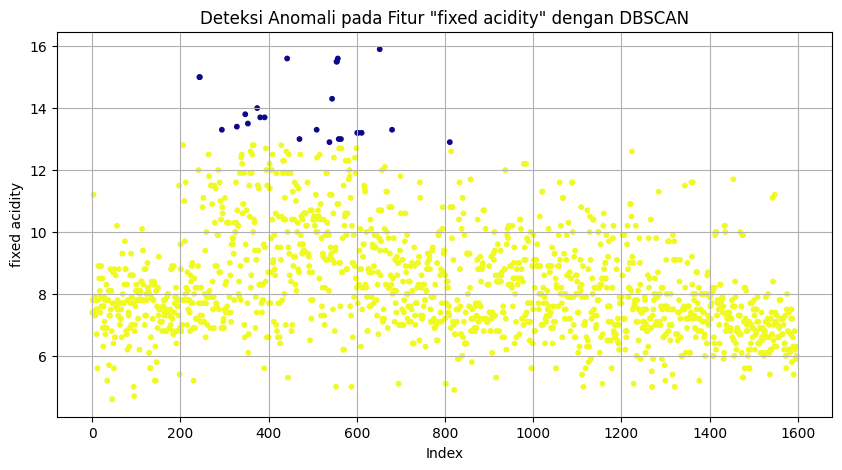

Jumlah anomali terdeteksi: 25


,fixed acidity
243,15.0
244,15.0
294,13.3
328,13.4
347,13.8
353,13.5
374,14.0
381,13.7
391,13.7
442,15.6


In [ ]:
# Tambahkan label ke DataFrame
df['DBSCAN_label'] = labels

# Visualisasi
plt.figure(figsize=(10, 5))
plt.scatter(range(len(X)), X, c=labels, cmap='plasma', s=10)
plt.title('Deteksi Anomali pada Fitur "fixed acidity" dengan DBSCAN')
plt.xlabel('Index')
plt.ylabel('fixed acidity')
plt.grid(True)
plt.show()

# Tampilkan anomali (label = -1)
anomali = df[df['DBSCAN_label'] == -1]
print("Jumlah anomali terdeteksi:", len(anomali))
anomali[['fixed acidity']]

# Projection: PCA (Principal Component Analysis) belom kelar

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

## Ploting

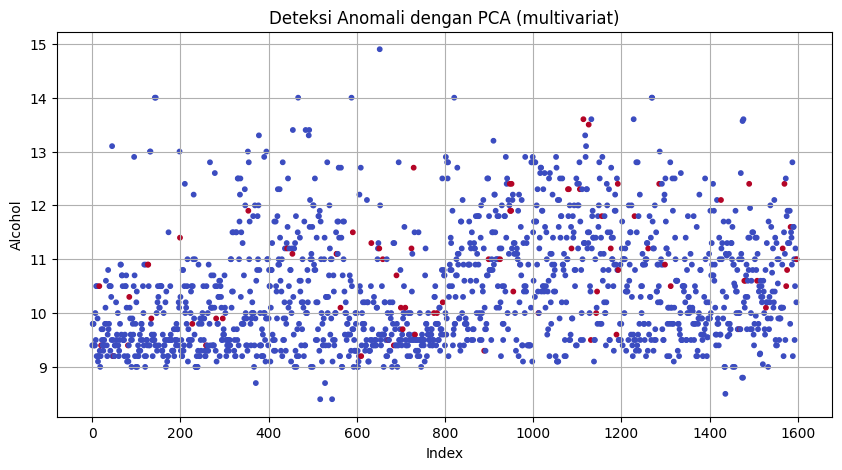

In [ ]:
# 4. Rekonstruksi
X_reconstructed = pca.inverse_transform(X_pca)

# 5. Hitung reconstruction error (MSE per data point)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)

# 6. Threshold: top 5% error sebagai anomali
threshold = np.percentile(reconstruction_error, 95)
anomaly_labels = (reconstruction_error > threshold).astype(int)

# 7. Tambahkan label ke DataFrame
df['anomaly_pca'] = anomaly_labels

# 8. Visualisasi rekonstruksi pada fitur "alcohol"
plt.figure(figsize=(10, 5))
plt.scatter(range(len(X)), df['alcohol'], c=anomaly_labels, cmap='coolwarm', s=10)
plt.title('Deteksi Anomali dengan PCA (multivariat)')
plt.xlabel('Index')
plt.ylabel('Alcohol')
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=df['anomaly_pca'].astype(str),  # Anomali sebagai warna
    labels={'color': 'Anomali'},
    title='Visualisasi PCA 3D dengan Anomali'
)
fig.update_traces(marker=dict(size=4))
fig.show()